# Video Game Sales Dataset Analysis

Dataset sourced from Kaggle: https://www.kaggle.com/sidtwr/videogames-sales-dataset

### Set up: import packages, upload dataset, check the head, and view info

In [260]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
#Read in CSV and save to a dataframe
sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

Sales are in millions of units sold. Other sales is rest of world outside of NA, EU, and JP

In [262]:
# check to ensure it loaded properly
sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Here, it is obvious that the first 10 columns have much more data than the last 6 columns. We will use this to split our data into two sets and make a model based on both. 

### Cleaning and Wrangling the Data - before split

#### Plotting data for visual exploration

In [264]:
# rename Year_of_Release column to Year for ease of use
sales.rename(columns={'Year_of_Release':'Year'}, inplace=True)

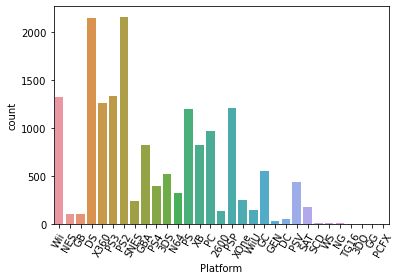

In [265]:
# creating a countplot to show the counts of each Platform
sns.countplot(x='Platform', data=sales)
locs, labels = plt.xticks();
plt.setp(labels, rotation=60);

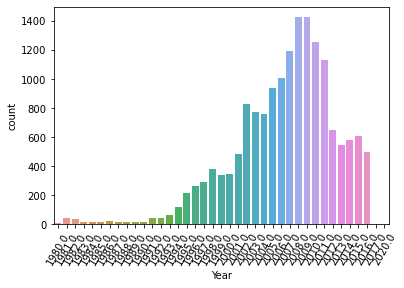

In [266]:
# creating a countplot to show the counts of each Year
sns.countplot(x='Year', data=sales)
locs, labels = plt.xticks();
plt.setp(labels, rotation=60);

#### Trimming data and grouping data

In [267]:
# removing years outside of the range 1994-2017
sales = sales[sales['Year'] >= 1994]
sales = sales[sales['Year'] < 2017]
sales = sales.reset_index()
del sales['index']

# checking how removing years affected row count
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16079 non-null  object 
 1   Platform      16079 non-null  object 
 2   Year          16079 non-null  float64
 3   Genre         16079 non-null  object 
 4   Publisher     16047 non-null  object 
 5   NA_Sales      16079 non-null  float64
 6   EU_Sales      16079 non-null  float64
 7   JP_Sales      16079 non-null  float64
 8   Other_Sales   16079 non-null  float64
 9   Global_Sales  16079 non-null  float64
 10  Critic_Score  7980 non-null   float64
 11  Critic_Count  7980 non-null   float64
 12  User_Score    7460 non-null   float64
 13  User_Count    7460 non-null   float64
 14  Developer     9902 non-null   object 
 15  Rating        9764 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [268]:
# viewing the Platforms by the count of each
sales.groupby('Platform').Platform.count().sort_values()

Platform
NES        1
PCFX       1
TG16       2
3DO        3
SCD        5
WS         6
NG        10
GEN       12
DC        52
GB        67
SNES     144
WiiU     147
SAT      173
XOne     247
N64      316
PS4      392
PSV      429
3DS      512
GC       542
XB       803
GBA      811
PC       950
PS      1190
PSP     1193
X360    1232
Wii     1286
PS3     1306
DS      2120
PS2     2127
Name: Platform, dtype: int64

In [269]:
# grouping the Platforms into major categories
sales['Platform_Groups'] = sales['Platform']
sales['Platform_Groups'].replace(['XOne', 'XB', 'X360'],'XB', inplace=True)
sales['Platform_Groups'].replace(['PS4', 'PSV', 'PS', 'PSP', 'PS3', 'PS2'],'PS', inplace=True)
sales['Platform_Groups'].replace(['Wii','WiiU', 'DS', 'GB', 'GBA', 'SNES', 'NES', 'GC', 'N64', '3DS'],'Nintendo', inplace=True)
sales['Platform_Groups'].replace(['PC', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'PCFX', 'TG16', '3DO', 'WS'],'Other',
                                inplace=True)

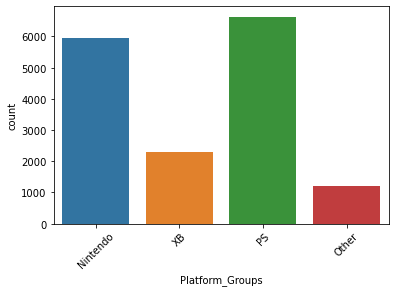

In [270]:
# new countplot showing categories of Platforms
sns.countplot(x='Platform_Groups', data=sales)
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);

In [271]:
# new value counts of categories of Platforms
sales.groupby('Platform_Groups').Platform.count().sort_values()

Platform_Groups
Other       1214
XB          2282
Nintendo    5946
PS          6637
Name: Platform, dtype: int64

In [272]:
# looking at the value count of Publishers
pub_count = sales.groupby('Publisher').Publisher.count()
pub_count1 = sales.groupby('Publisher').Publisher.count().sort_values()
pub_count1[-30:] # gives back 30 rows starting from the bottom
# sales.groupby('Publisher').Publisher.count().sort_values()

Publisher
Majesco Entertainment                       90
Unknown                                     98
Zoo Digital Publishing                     104
Nippon Ichi Software                       105
Deep Silver                                120
Idea Factory                               131
Codemasters                                148
Vivendi Games                              161
D3Publisher                                183
Acclaim Entertainment                      183
Microsoft Game Studios                     191
505 Games                                  191
Eidos Interactive                          196
Midway Games                               196
Disney Interactive Studios                 214
Warner Bros. Interactive Entertainment     220
Square Enix                                232
Atari                                      309
Tecmo Koei                                 343
Capcom                                     356
Take-Two Interactive                       421
Nin

Efforts below were attempts to group publisher and have the total count for that publisher be displayed on each row/instance/record the publisher appeared to then use that numeric column as binning constraints.

In [273]:
# pub_count_1 = pub_count <= 1
# len(pub_count_1)
# pub_count_1

In [274]:
# pub_count_1 = pub_count <= 1
# len(pub_count_1)
# pub_count_1
# true_vals = []
# for i in pub_count_1:
#    if i == True:
#     true_vals.append()
# true_vals
# pub_count_1 = pub_count_1[-100:-50]
# len(pub_count_1)
# pub_count_1 = pub_count_1[-100:]
# pub_count_1 = pub_count_1[-100:]

In [275]:
# pub = sales.Publisher.value_counts() < 50

In [276]:
#Creating a new column 'Pub_Counts' that displays the count of each Publisher
sales['Pub_Counts'] = sales.groupby(['Publisher'])['Name'].transform('count')
sales[['Pub_Counts', 'Publisher']][0:20]

,Pub_Counts,Publisher
0,614.0,Nintendo
1,614.0,Nintendo
2,614.0,Nintendo
3,614.0,Nintendo
4,614.0,Nintendo
5,614.0,Nintendo
6,614.0,Nintendo
7,614.0,Nintendo
8,614.0,Nintendo
9,614.0,Nintendo


#### Binning Data 

In [277]:
#creating bins of pub_counts for categorization
bins = np.linspace(min(sales.Pub_Counts), max(sales.Pub_Counts), 4)
bins

array([1.00000000e+00, 4.48333333e+02, 8.95666667e+02, 1.34300000e+03])

In [278]:
#Titles for Bins
group_names = [1, 2, 3]

In [279]:
#Placing Binned values into Dataframe
sales['Publisher_Groups'] = pd.cut(sales.Pub_Counts, bins, labels=group_names, include_lowest=True )
sales[['Publisher', 'Publisher_Groups']].head(20)

,Publisher,Publisher_Groups
0,Nintendo,2
1,Nintendo,2
2,Nintendo,2
3,Nintendo,2
4,Nintendo,2
5,Nintendo,2
6,Nintendo,2
7,Nintendo,2
8,Nintendo,2
9,Nintendo,2


In [280]:
# check Genres - already in well organized groups
sales.groupby('Genre').Publisher.count().sort_values()

Genre
Puzzle           536
Strategy         663
Fighting         814
Platform         819
Simulation       846
Racing          1210
Shooter         1258
Adventure       1282
Role-Playing    1451
Misc            1683
Sports          2260
Action          3225
Name: Publisher, dtype: int64

### Creating a new dataframe for our first model

In [281]:
# Made new df for next Decision Tree Model
sales_wide = sales.copy()

In [282]:
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16079 non-null  object  
 1   Platform          16079 non-null  object  
 2   Year              16079 non-null  float64 
 3   Genre             16079 non-null  object  
 4   Publisher         16047 non-null  object  
 5   NA_Sales          16079 non-null  float64 
 6   EU_Sales          16079 non-null  float64 
 7   JP_Sales          16079 non-null  float64 
 8   Other_Sales       16079 non-null  float64 
 9   Global_Sales      16079 non-null  float64 
 10  Critic_Score      7980 non-null   float64 
 11  Critic_Count      7980 non-null   float64 
 12  User_Score        7460 non-null   float64 
 13  User_Count        7460 non-null   float64 
 14  Developer         9902 non-null   object  
 15  Rating            9764 non-null   object  
 16  Platform_Groups   1607

### Trimming sales_wide

In [283]:
# Drop column we aren't using in this model
sales_wide.drop('NA_Sales', axis=1, inplace=True)
sales_wide.drop('EU_Sales', axis=1, inplace=True)
sales_wide.drop('JP_Sales', axis=1, inplace=True)
sales_wide.drop('Other_Sales', axis=1, inplace=True)

In [284]:
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16079 non-null  object  
 1   Platform          16079 non-null  object  
 2   Year              16079 non-null  float64 
 3   Genre             16079 non-null  object  
 4   Publisher         16047 non-null  object  
 5   Global_Sales      16079 non-null  float64 
 6   Critic_Score      7980 non-null   float64 
 7   Critic_Count      7980 non-null   float64 
 8   User_Score        7460 non-null   float64 
 9   User_Count        7460 non-null   float64 
 10  Developer         9902 non-null   object  
 11  Rating            9764 non-null   object  
 12  Platform_Groups   16079 non-null  object  
 13  Pub_Counts        16047 non-null  float64 
 14  Publisher_Groups  16047 non-null  category
dtypes: category(1), float64(7), object(7)
memory usage: 1.7+ MB


In [285]:
#Drop NaN values
sales_wide = sales_wide.dropna(subset=['User_Count'], axis=0)

In [286]:
#Drop NaN values
sales_wide = sales_wide.dropna(subset=['Critic_Count'], axis=0)

In [287]:
#Drop NaN values
sales_wide = sales_wide.dropna(subset=['Rating'], axis=0)

In [288]:
# every column is now completely non-null
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 16066
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              6823 non-null   object  
 1   Platform          6823 non-null   object  
 2   Year              6823 non-null   float64 
 3   Genre             6823 non-null   object  
 4   Publisher         6822 non-null   object  
 5   Global_Sales      6823 non-null   float64 
 6   Critic_Score      6823 non-null   float64 
 7   Critic_Count      6823 non-null   float64 
 8   User_Score        6823 non-null   float64 
 9   User_Count        6823 non-null   float64 
 10  Developer         6823 non-null   object  
 11  Rating            6823 non-null   object  
 12  Platform_Groups   6823 non-null   object  
 13  Pub_Counts        6822 non-null   float64 
 14  Publisher_Groups  6822 non-null   category
dtypes: category(1), float64(7), object(7)
memory usage: 806.4+ KB


#### Binning sales_wide

In [289]:
#Binned user_count for categories
bins1 = np.linspace(min(sales_wide['User_Count']), max(sales['User_Count']), 4)
bins1

array([4.00000000e+00, 3.55766667e+03, 7.11133333e+03, 1.06650000e+04])

In [290]:
#Named bins
User_names = [1, 2, 3]

In [291]:
#Added binned column to Dataframe
sales_wide['User_Bins'] = pd.cut(sales_wide['User_Count'], bins1, labels=User_names, include_lowest=True )
sales_wide[['User_Count','User_Bins']].head(20)

,User_Count,User_Bins
0,322.0,1
1,709.0,1
2,192.0,1
4,431.0,1
5,129.0,1
6,594.0,1
8,464.0,1
10,146.0,1
11,106.0,1
12,52.0,1


In [292]:
#Binning Critic_Count
bins2 = np.linspace(min(sales_wide['Critic_Count']), max(sales_wide['Critic_Count']), 4)
bins2

array([  3.        ,  39.66666667,  76.33333333, 113.        ])

In [293]:
#Name bins
Critic_names = [1, 2, 3]

In [294]:
#Added Binned Critic_Count column to Dataframe
sales_wide['Critic_Bins'] = pd.cut(sales_wide['Critic_Count'], bins2, labels=Critic_names, include_lowest=True )
sales_wide[['Critic_Count','Critic_Bins']].head(20)

,Critic_Count,Critic_Bins
0,51.0,2
1,73.0,2
2,73.0,2
4,65.0,2
5,41.0,2
6,80.0,3
8,64.0,2
10,63.0,2
11,45.0,2
12,33.0,1


In [295]:
sales_wide.head(10)

,Name,Platform,Year,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Groups,Pub_Counts,Publisher_Groups,User_Bins,Critic_Bins
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Nintendo,614.0,2,1,2
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo,614.0,2,1,2
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Nintendo,614.0,2,1,2
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Nintendo,614.0,2,1,2
5,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Nintendo,614.0,2,1,2
6,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.32,87.0,80.0,8.4,594.0,Nintendo,E,Nintendo,614.0,2,1,3
8,Mario Kart DS,DS,2005.0,Racing,Nintendo,23.21,91.0,64.0,8.6,464.0,Nintendo,E,Nintendo,614.0,2,1,2
10,Wii Fit,Wii,2007.0,Sports,Nintendo,22.70,80.0,63.0,7.7,146.0,Nintendo,E,Nintendo,614.0,2,1,2
11,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,XB,191.0,1,1,2
12,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,21.79,80.0,33.0,7.4,52.0,Nintendo,E,Nintendo,614.0,2,1,1


#### Normalization of User and Critic Scores for sales_wide

In [296]:
#Normailzed Critic Score to User Score
sales_wide['Critic_Score_Adj'] = (sales['Critic_Score'])/10

In [297]:
sales_wide.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Groups,Pub_Counts,Publisher_Groups,User_Bins,Critic_Bins,Critic_Score_Adj
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Nintendo,614.0,2,1,2,7.6
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo,614.0,2,1,2,8.2
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Nintendo,614.0,2,1,2,8.0
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Nintendo,614.0,2,1,2,8.9
5,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Nintendo,614.0,2,1,2,5.8


In [298]:
#Check columns for reorganization
cols = list(sales_wide.columns.values)
cols

['Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating',
 'Platform_Groups',
 'Pub_Counts',
 'Publisher_Groups',
 'User_Bins',
 'Critic_Bins',
 'Critic_Score_Adj']

In [299]:
#Reorganize columns
sales_wide = sales_wide[['Name', 'Platform', 'Platform_Groups', 'Year', 'Genre', 'Publisher', 'Pub_Counts', 'Publisher_Groups', 
                        'Critic_Score', 'Critic_Score_Adj', 'Critic_Count', 'Critic_Bins', 'User_Score', 'User_Count', 
                         'User_Bins', 'Developer', 'Rating', 'Global_Sales']]

#### Deliverable 1 Version of sales_wide

In [300]:
sales_wide.head(10)

,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Publisher_Groups,Critic_Score,Critic_Score_Adj,Critic_Count,Critic_Bins,User_Score,User_Count,User_Bins,Developer,Rating,Global_Sales
0,Wii Sports,Wii,Nintendo,2006.0,Sports,Nintendo,614.0,2,76.0,7.6,51.0,2,8.0,322.0,1,Nintendo,E,82.53
1,Mario Kart Wii,Wii,Nintendo,2008.0,Racing,Nintendo,614.0,2,82.0,8.2,73.0,2,8.3,709.0,1,Nintendo,E,35.52
2,Wii Sports Resort,Wii,Nintendo,2009.0,Sports,Nintendo,614.0,2,80.0,8.0,73.0,2,8.0,192.0,1,Nintendo,E,32.77
4,New Super Mario Bros.,DS,Nintendo,2006.0,Platform,Nintendo,614.0,2,89.0,8.9,65.0,2,8.5,431.0,1,Nintendo,E,29.80
5,Wii Play,Wii,Nintendo,2006.0,Misc,Nintendo,614.0,2,58.0,5.8,41.0,2,6.6,129.0,1,Nintendo,E,28.92
6,New Super Mario Bros. Wii,Wii,Nintendo,2009.0,Platform,Nintendo,614.0,2,87.0,8.7,80.0,3,8.4,594.0,1,Nintendo,E,28.32
8,Mario Kart DS,DS,Nintendo,2005.0,Racing,Nintendo,614.0,2,91.0,9.1,64.0,2,8.6,464.0,1,Nintendo,E,23.21
10,Wii Fit,Wii,Nintendo,2007.0,Sports,Nintendo,614.0,2,80.0,8.0,63.0,2,7.7,146.0,1,Nintendo,E,22.70
11,Kinect Adventures!,X360,XB,2010.0,Misc,Microsoft Game Studios,191.0,1,61.0,6.1,45.0,2,6.3,106.0,1,Good Science Studio,E,21.81
12,Wii Fit Plus,Wii,Nintendo,2009.0,Sports,Nintendo,614.0,2,80.0,8.0,33.0,1,7.4,52.0,1,Nintendo,E,21.79


#### Creating dummy variables 

In [301]:
# Categorizing String vars to Numeric vars for sklearn
# Nintendo = 1, XB = 2, PS = 3, Other = 4
sales_wide['Platform_Groups'].replace(['Nintendo'], 1, inplace=True)
sales_wide['Platform_Groups'].replace(['XB'], 2, inplace=True)
sales_wide['Platform_Groups'].replace(['PS'], 3, inplace=True)
sales_wide['Platform_Groups'].replace(['Other'], 4, inplace=True)

sales_wide.head(10)

,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Publisher_Groups,Critic_Score,Critic_Score_Adj,Critic_Count,Critic_Bins,User_Score,User_Count,User_Bins,Developer,Rating,Global_Sales
0,Wii Sports,Wii,1,2006.0,Sports,Nintendo,614.0,2,76.0,7.6,51.0,2,8.0,322.0,1,Nintendo,E,82.53
1,Mario Kart Wii,Wii,1,2008.0,Racing,Nintendo,614.0,2,82.0,8.2,73.0,2,8.3,709.0,1,Nintendo,E,35.52
2,Wii Sports Resort,Wii,1,2009.0,Sports,Nintendo,614.0,2,80.0,8.0,73.0,2,8.0,192.0,1,Nintendo,E,32.77
4,New Super Mario Bros.,DS,1,2006.0,Platform,Nintendo,614.0,2,89.0,8.9,65.0,2,8.5,431.0,1,Nintendo,E,29.80
5,Wii Play,Wii,1,2006.0,Misc,Nintendo,614.0,2,58.0,5.8,41.0,2,6.6,129.0,1,Nintendo,E,28.92
6,New Super Mario Bros. Wii,Wii,1,2009.0,Platform,Nintendo,614.0,2,87.0,8.7,80.0,3,8.4,594.0,1,Nintendo,E,28.32
8,Mario Kart DS,DS,1,2005.0,Racing,Nintendo,614.0,2,91.0,9.1,64.0,2,8.6,464.0,1,Nintendo,E,23.21
10,Wii Fit,Wii,1,2007.0,Sports,Nintendo,614.0,2,80.0,8.0,63.0,2,7.7,146.0,1,Nintendo,E,22.70
11,Kinect Adventures!,X360,2,2010.0,Misc,Microsoft Game Studios,191.0,1,61.0,6.1,45.0,2,6.3,106.0,1,Good Science Studio,E,21.81
12,Wii Fit Plus,Wii,1,2009.0,Sports,Nintendo,614.0,2,80.0,8.0,33.0,1,7.4,52.0,1,Nintendo,E,21.79


In [302]:
sales_wide.Platform_Groups.value_counts()

3    2806
1    1772
2    1582
4     663
Name: Platform_Groups, dtype: int64

In [303]:
sales_wide.Genre.value_counts()

Action          1630
Sports           943
Shooter          863
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       295
Strategy         268
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [304]:
#Categorizing String vars to Numeric vars for sklearm
sales_wide['Genre'].replace(['Action'],1, inplace=True)
sales_wide['Genre'].replace(['Sports'],2, inplace=True)
sales_wide['Genre'].replace(['Shooter'],3, inplace=True)
sales_wide['Genre'].replace(['Role-Playing'],4, inplace=True)
sales_wide['Genre'].replace(['Racing'],5, inplace=True)
sales_wide['Genre'].replace(['Platform'],6, inplace=True)
sales_wide['Genre'].replace(['Misc'],7, inplace=True)
sales_wide['Genre'].replace(['Fighting'],8, inplace=True)
sales_wide['Genre'].replace(['Simulation'],9, inplace=True)
sales_wide['Genre'].replace(['Strategy'],10, inplace=True)
sales_wide['Genre'].replace(['Adventure'],11, inplace=True)
sales_wide['Genre'].replace(['Puzzle'],12, inplace=True)
sales_wide.Genre.value_counts()

1     1630
2      943
3      863
4      712
5      581
6      403
7      384
8      378
9      295
10     268
11     248
12     118
Name: Genre, dtype: int64

In [305]:
sales_wide.Publisher_Groups.value_counts()

1    3210
3    2170
2    1442
Name: Publisher_Groups, dtype: int64

In [306]:
sales_wide.Rating.value_counts()


T       2377
E       2082
M       1432
E10+     929
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64

#### Dropping the AO, RP, and K-A rows

In [307]:
sales_wide = sales_wide.drop(sales_wide[sales_wide['Rating']=='AO'].index)
sales_wide = sales_wide.drop(sales_wide[sales_wide['Rating']=='RP'].index)
sales_wide = sales_wide.drop(sales_wide[sales_wide['Rating']=='K-A'].index)

In [308]:
#Resetting Index to prep for droping data
sales_wide = sales_wide.reset_index()
del sales_wide['index']
sales_wide.head()

,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Publisher_Groups,Critic_Score,Critic_Score_Adj,Critic_Count,Critic_Bins,User_Score,User_Count,User_Bins,Developer,Rating,Global_Sales
0,Wii Sports,Wii,1,2006.0,2,Nintendo,614.0,2,76.0,7.6,51.0,2,8.0,322.0,1,Nintendo,E,82.53
1,Mario Kart Wii,Wii,1,2008.0,5,Nintendo,614.0,2,82.0,8.2,73.0,2,8.3,709.0,1,Nintendo,E,35.52
2,Wii Sports Resort,Wii,1,2009.0,2,Nintendo,614.0,2,80.0,8.0,73.0,2,8.0,192.0,1,Nintendo,E,32.77
3,New Super Mario Bros.,DS,1,2006.0,6,Nintendo,614.0,2,89.0,8.9,65.0,2,8.5,431.0,1,Nintendo,E,29.80
4,Wii Play,Wii,1,2006.0,7,Nintendo,614.0,2,58.0,5.8,41.0,2,6.6,129.0,1,Nintendo,E,28.92


In [309]:
sales_wide.Rating.value_counts()

T       2377
E       2082
M       1432
E10+     929
Name: Rating, dtype: int64

In [310]:
# replace text values with numeric categories for model
sales_wide.replace({'E':1, 'E10+':2, 'T':3, 'M': 4}, inplace = True)
sales_wide.Rating.value_counts()

3    2377
1    2082
4    1432
2     929
Name: Rating, dtype: int64

In [311]:
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              6820 non-null   object  
 1   Platform          6820 non-null   object  
 2   Platform_Groups   6820 non-null   int64   
 3   Year              6820 non-null   float64 
 4   Genre             6820 non-null   int64   
 5   Publisher         6819 non-null   object  
 6   Pub_Counts        6819 non-null   float64 
 7   Publisher_Groups  6819 non-null   category
 8   Critic_Score      6820 non-null   float64 
 9   Critic_Score_Adj  6820 non-null   float64 
 10  Critic_Count      6820 non-null   float64 
 11  Critic_Bins       6820 non-null   category
 12  User_Score        6820 non-null   float64 
 13  User_Count        6820 non-null   float64 
 14  User_Bins         6820 non-null   category
 15  Developer         6820 non-null   object  
 16  Rating            6820 n

In [312]:
# Drop NaN of one missing value
sales_wide.dropna(subset=['Publisher_Groups'], axis = 0, inplace = True)

In [313]:
# change data types
sales_wide.Publisher_Groups =sales_wide.Publisher_Groups.astype('float')
sales_wide.Critic_Bins =sales_wide.Critic_Bins.astype('float')
sales_wide.User_Bins = sales_wide.User_Bins.astype('float')
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 0 to 6819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6819 non-null   object 
 1   Platform          6819 non-null   object 
 2   Platform_Groups   6819 non-null   int64  
 3   Year              6819 non-null   float64
 4   Genre             6819 non-null   int64  
 5   Publisher         6819 non-null   object 
 6   Pub_Counts        6819 non-null   float64
 7   Publisher_Groups  6819 non-null   float64
 8   Critic_Score      6819 non-null   float64
 9   Critic_Score_Adj  6819 non-null   float64
 10  Critic_Count      6819 non-null   float64
 11  Critic_Bins       6819 non-null   float64
 12  User_Score        6819 non-null   float64
 13  User_Count        6819 non-null   float64
 14  User_Bins         6819 non-null   float64
 15  Developer         6819 non-null   object 
 16  Rating            6819 non-null   int64  


#### Drop columns not being used in model

In [314]:
sales_wide.drop(['Publisher','Name', 'Pub_Counts', 'Platform','Developer'], axis=1, inplace=True)

In [315]:
sales_wide.drop(['Critic_Score','Critic_Count', 'User_Count'], axis=1, inplace=True)
sales_wide.head()

,Platform_Groups,Year,Genre,Publisher_Groups,Critic_Score_Adj,Critic_Bins,User_Score,User_Bins,Rating,Global_Sales
0,1,2006.0,2,2.0,7.6,2.0,8.0,1.0,1,82.53
1,1,2008.0,5,2.0,8.2,2.0,8.3,1.0,1,35.52
2,1,2009.0,2,2.0,8.0,2.0,8.0,1.0,1,32.77
3,1,2006.0,6,2.0,8.9,2.0,8.5,1.0,1,29.80
4,1,2006.0,7,2.0,5.8,2.0,6.6,1.0,1,28.92


In [316]:
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 0 to 6819
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platform_Groups   6819 non-null   int64  
 1   Year              6819 non-null   float64
 2   Genre             6819 non-null   int64  
 3   Publisher_Groups  6819 non-null   float64
 4   Critic_Score_Adj  6819 non-null   float64
 5   Critic_Bins       6819 non-null   float64
 6   User_Score        6819 non-null   float64
 7   User_Bins         6819 non-null   float64
 8   Rating            6819 non-null   int64  
 9   Global_Sales      6819 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 586.0 KB


### Importing scikit learn packages and splitting our dataset

In [317]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [318]:
#Split off value to predict for Dataframe 1
sales_wide_Y = sales_wide['Global_Sales']
sales_wide_Y.head()

0    82.53
1    35.52
2    32.77
3    29.80
4    28.92
Name: Global_Sales, dtype: float64

In [319]:
#Dropping our dependent var
sales_wide.drop(['Global_Sales'], axis =1, inplace =True)
sales_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 0 to 6819
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platform_Groups   6819 non-null   int64  
 1   Year              6819 non-null   float64
 2   Genre             6819 non-null   int64  
 3   Publisher_Groups  6819 non-null   float64
 4   Critic_Score_Adj  6819 non-null   float64
 5   Critic_Bins       6819 non-null   float64
 6   User_Score        6819 non-null   float64
 7   User_Bins         6819 non-null   float64
 8   Rating            6819 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 532.7 KB


In [320]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(sales_wide, sales_wide_Y, test_size=0.20, random_state=9)

In [321]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 1224 to 382
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platform_Groups   5455 non-null   int64  
 1   Year              5455 non-null   float64
 2   Genre             5455 non-null   int64  
 3   Publisher_Groups  5455 non-null   float64
 4   Critic_Score_Adj  5455 non-null   float64
 5   Critic_Bins       5455 non-null   float64
 6   User_Score        5455 non-null   float64
 7   User_Bins         5455 non-null   float64
 8   Rating            5455 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 426.2 KB


In [322]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 4159 to 4778
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platform_Groups   1364 non-null   int64  
 1   Year              1364 non-null   float64
 2   Genre             1364 non-null   int64  
 3   Publisher_Groups  1364 non-null   float64
 4   Critic_Score_Adj  1364 non-null   float64
 5   Critic_Bins       1364 non-null   float64
 6   User_Score        1364 non-null   float64
 7   User_Bins         1364 non-null   float64
 8   Rating            1364 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 106.6 KB


### Creating and fitting model for sales_wide

In [323]:
#Creating model and fitting it to data
model = RandomForestRegressor(n_estimators=250, max_depth=4, bootstrap=True)#n_estimators = num of trees = hyperparameter
model.fit(X_train, y_train)
# X_train.head()

RandomForestRegressor(max_depth=4, n_estimators=250)

In [324]:
# model.predict(X_test)
y_pred = model.predict(X_test)

# We were surprised by how low our R^2 was!

In [325]:
# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 1.6748450564724402
R-Squared: 0.22953586983063345


### First model's highest R^2 was 0.229

### Now moving onto our narrow model, maybe more rows will help (but fewer columns)

In [326]:
sales_narrow = sales.copy()

In [327]:
sales_narrow.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Groups,Pub_Counts,Publisher_Groups
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Nintendo,614.0,2
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo,614.0,2
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Nintendo,614.0,2
3,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,614.0,2
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Nintendo,614.0,2


#### Trimming sales_narrow to columns that have over 16,000 complete rows

In [328]:
sales_narrow.drop(['Name','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Critic_Score', 
                   'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Publisher', 
                   'Platform', 'Pub_Counts'], axis=1, inplace=True)

In [329]:
sales_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              16079 non-null  float64 
 1   Genre             16079 non-null  object  
 2   Global_Sales      16079 non-null  float64 
 3   Platform_Groups   16079 non-null  object  
 4   Publisher_Groups  16047 non-null  category
dtypes: category(1), float64(2), object(2)
memory usage: 518.4+ KB


In [330]:
sales_narrow.head()

,Year,Genre,Global_Sales,Platform_Groups,Publisher_Groups
0,2006.0,Sports,82.53,Nintendo,2
1,2008.0,Racing,35.52,Nintendo,2
2,2009.0,Sports,32.77,Nintendo,2
3,1996.0,Role-Playing,31.37,Nintendo,2
4,2006.0,Platform,29.80,Nintendo,2


In [331]:
# Dropping small amount of NaN values
sales_narrow.dropna(subset=['Publisher_Groups'], axis=0, inplace = True)

In [332]:
sales_narrow = sales_narrow[['Year', 'Genre', 'Platform_Groups', 'Publisher_Groups', 'Global_Sales']]
sales_narrow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16047 entries, 0 to 16078
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              16047 non-null  float64 
 1   Genre             16047 non-null  object  
 2   Platform_Groups   16047 non-null  object  
 3   Publisher_Groups  16047 non-null  category
 4   Global_Sales      16047 non-null  float64 
dtypes: category(1), float64(2), object(2)
memory usage: 642.6+ KB


#### Binning and Dummy Coding

In [333]:
#Categorizing String vars to Numeric vars for sklearm
sales_narrow['Genre'].replace(['Action'],1, inplace=True)
sales_narrow['Genre'].replace(['Sports'],2, inplace=True)
sales_narrow['Genre'].replace(['Shooter'],3, inplace=True)
sales_narrow['Genre'].replace(['Role-Playing'],4, inplace=True)
sales_narrow['Genre'].replace(['Racing'],5, inplace=True)
sales_narrow['Genre'].replace(['Platform'],6, inplace=True)
sales_narrow['Genre'].replace(['Misc'],7, inplace=True)
sales_narrow['Genre'].replace(['Fighting'],8, inplace=True)
sales_narrow['Genre'].replace(['Simulation'],9, inplace=True)
sales_narrow['Genre'].replace(['Strategy'],10, inplace=True)
sales_narrow['Genre'].replace(['Adventure'],11, inplace=True)
sales_narrow['Genre'].replace(['Puzzle'],12, inplace=True)
sales_narrow.Genre.value_counts()

1     3225
2     2260
7     1683
4     1451
11    1282
3     1258
5     1210
9      846
6      819
8      814
10     663
12     536
Name: Genre, dtype: int64

In [334]:
# replacing platform group with a number
sales_narrow['Platform_Groups'].replace(['Nintendo'],1, inplace=True)
sales_narrow['Platform_Groups'].replace(['XB'],2, inplace=True)
sales_narrow['Platform_Groups'].replace(['PS'],3, inplace=True)
sales_narrow['Platform_Groups'].replace(['Other'],4, inplace=True)
sales_narrow.Platform_Groups.value_counts()

3    6635
1    5921
2    2282
4    1209
Name: Platform_Groups, dtype: int64

In [335]:
#Split off value to predict for Dataframe 1
sales_narrow_Y = sales_narrow['Global_Sales']
sales_narrow_Y.head()

0    82.53
1    35.52
2    32.77
3    31.37
4    29.80
Name: Global_Sales, dtype: float64

In [336]:
#Dropping our dependent var
sales_narrow.drop(['Global_Sales'], axis = 1, inplace = True)
sales_narrow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16047 entries, 0 to 16078
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              16047 non-null  float64 
 1   Genre             16047 non-null  int64   
 2   Platform_Groups   16047 non-null  int64   
 3   Publisher_Groups  16047 non-null  category
dtypes: category(1), float64(1), int64(2)
memory usage: 517.3 KB


### Creating and fitting model for sales_narrow 

In [337]:
# Split the data into training/testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(sales_narrow, sales_narrow_Y, test_size=0.20, random_state=9)

In [338]:
#Creating model and fitting it to data
model = RandomForestRegressor(n_estimators=100, max_depth=7, bootstrap=True)#n_estimators = num of trees = hyperparameter
model.fit(X2_train, y2_train)
# X_train.head()

RandomForestRegressor(max_depth=7)

In [339]:
# model.predict(X_test)
y2_pred = model.predict(X2_test)

## New model is even worse... 

### Sales_narrow model has an R^2 of 0.084

In [340]:
# The mean squared error
mse2 = mean_squared_error(y2_test, y2_pred)
print('Mean squared error:', mse2)

# The coefficient of determination: 1 is perfect prediction
r2_2 = r2_score(y2_test, y2_pred)
print('R-Squared:', r2_2)

Mean squared error: 1.2639713688167873
R-Squared: 0.07456384187403653


# Sales_narrow is likely beyond redepmtion... so we adjusted our sales_wide

In [341]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16079 non-null  object  
 1   Platform          16079 non-null  object  
 2   Year              16079 non-null  float64 
 3   Genre             16079 non-null  object  
 4   Publisher         16047 non-null  object  
 5   NA_Sales          16079 non-null  float64 
 6   EU_Sales          16079 non-null  float64 
 7   JP_Sales          16079 non-null  float64 
 8   Other_Sales       16079 non-null  float64 
 9   Global_Sales      16079 non-null  float64 
 10  Critic_Score      7980 non-null   float64 
 11  Critic_Count      7980 non-null   float64 
 12  User_Score        7460 non-null   float64 
 13  User_Count        7460 non-null   float64 
 14  Developer         9902 non-null   object  
 15  Rating            9764 non-null   object  
 16  Platform_Groups   1607

## Fresh Dataset

In [342]:
sales_g = sales.copy()

In [343]:
# dropping same columns as from sales_wide
sales_g = sales_g.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Developer'], axis = 1)

In [344]:
sales_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16079 non-null  object  
 1   Platform          16079 non-null  object  
 2   Year              16079 non-null  float64 
 3   Genre             16079 non-null  object  
 4   Publisher         16047 non-null  object  
 5   Global_Sales      16079 non-null  float64 
 6   Critic_Score      7980 non-null   float64 
 7   Critic_Count      7980 non-null   float64 
 8   User_Score        7460 non-null   float64 
 9   User_Count        7460 non-null   float64 
 10  Rating            9764 non-null   object  
 11  Platform_Groups   16079 non-null  object  
 12  Pub_Counts        16047 non-null  float64 
 13  Publisher_Groups  16047 non-null  category
dtypes: category(1), float64(7), object(6)
memory usage: 1.6+ MB


In [345]:
# rearrange columns
sales_g = sales_g[['Name', 'Platform', 'Platform_Groups', 'Year', 'Genre', 'Publisher', 'Pub_Counts', 'Publisher_Groups', 
                   'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating', 'Global_Sales']]

In [346]:
sales_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16079 non-null  object  
 1   Platform          16079 non-null  object  
 2   Platform_Groups   16079 non-null  object  
 3   Year              16079 non-null  float64 
 4   Genre             16079 non-null  object  
 5   Publisher         16047 non-null  object  
 6   Pub_Counts        16047 non-null  float64 
 7   Publisher_Groups  16047 non-null  category
 8   Critic_Score      7980 non-null   float64 
 9   Critic_Count      7980 non-null   float64 
 10  User_Score        7460 non-null   float64 
 11  User_Count        7460 non-null   float64 
 12  Rating            9764 non-null   object  
 13  Global_Sales      16079 non-null  float64 
dtypes: category(1), float64(7), object(6)
memory usage: 1.6+ MB


In [347]:
# Drop NaNs
sales_g = sales_g.dropna(subset=['Critic_Score'], axis=0)

In [348]:
sales_g = sales_g.dropna(subset=['User_Score'], axis=0)

In [349]:
sales_g = sales_g.dropna(subset=['Publisher'], axis=0)

In [350]:
sales_g = sales_g.dropna(subset=['Rating'], axis=0)

In [351]:
sales_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6822 entries, 0 to 16066
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              6822 non-null   object  
 1   Platform          6822 non-null   object  
 2   Platform_Groups   6822 non-null   object  
 3   Year              6822 non-null   float64 
 4   Genre             6822 non-null   object  
 5   Publisher         6822 non-null   object  
 6   Pub_Counts        6822 non-null   float64 
 7   Publisher_Groups  6822 non-null   category
 8   Critic_Score      6822 non-null   float64 
 9   Critic_Count      6822 non-null   float64 
 10  User_Score        6822 non-null   float64 
 11  User_Count        6822 non-null   float64 
 12  Rating            6822 non-null   object  
 13  Global_Sales      6822 non-null   float64 
dtypes: category(1), float64(7), object(6)
memory usage: 752.9+ KB


In [352]:
sales_g.head()

,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Publisher_Groups,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales
0,Wii Sports,Wii,Nintendo,2006.0,Sports,Nintendo,614.0,2,76.0,51.0,8.0,322.0,E,82.53
1,Mario Kart Wii,Wii,Nintendo,2008.0,Racing,Nintendo,614.0,2,82.0,73.0,8.3,709.0,E,35.52
2,Wii Sports Resort,Wii,Nintendo,2009.0,Sports,Nintendo,614.0,2,80.0,73.0,8.0,192.0,E,32.77
4,New Super Mario Bros.,DS,Nintendo,2006.0,Platform,Nintendo,614.0,2,89.0,65.0,8.5,431.0,E,29.80
5,Wii Play,Wii,Nintendo,2006.0,Misc,Nintendo,614.0,2,58.0,41.0,6.6,129.0,E,28.92


## Creating bins again for publisher groups but doing more

In [353]:
# creating bins of pub_counts for categorization
binsg = np.linspace(min(sales.Pub_Counts), max(sales.Pub_Counts), 9)
binsg

array([1.00000e+00, 1.68750e+02, 3.36500e+02, 5.04250e+02, 6.72000e+02,
       8.39750e+02, 1.00750e+03, 1.17525e+03, 1.34300e+03])

In [354]:
#Titles for Bins
group_namesg = [1,2,3,4,5,6,7,8]

In [355]:
#Placing Binned values into Dataframe
sales_g['PubG'] = pd.cut(sales_g.Pub_Counts, binsg, labels=group_namesg, include_lowest=True )

In [356]:
# dropping original column now that we have bins
sales_g = sales_g.drop(['Publisher_Groups'], axis=1)

In [357]:
sales_g.head()

,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,PubG
0,Wii Sports,Wii,Nintendo,2006.0,Sports,Nintendo,614.0,76.0,51.0,8.0,322.0,E,82.53,4
1,Mario Kart Wii,Wii,Nintendo,2008.0,Racing,Nintendo,614.0,82.0,73.0,8.3,709.0,E,35.52,4
2,Wii Sports Resort,Wii,Nintendo,2009.0,Sports,Nintendo,614.0,80.0,73.0,8.0,192.0,E,32.77,4
4,New Super Mario Bros.,DS,Nintendo,2006.0,Platform,Nintendo,614.0,89.0,65.0,8.5,431.0,E,29.80,4
5,Wii Play,Wii,Nintendo,2006.0,Misc,Nintendo,614.0,58.0,41.0,6.6,129.0,E,28.92,4


In [358]:
#Categorizing String vars to Numeric vars for sklearm
sales_g['Genre'].replace(['Action'],1, inplace=True)
sales_g['Genre'].replace(['Sports'],2, inplace=True)
sales_g['Genre'].replace(['Shooter'],3, inplace=True)
sales_g['Genre'].replace(['Role-Playing'],4, inplace=True)
sales_g['Genre'].replace(['Racing'],5, inplace=True)
sales_g['Genre'].replace(['Platform'],6, inplace=True)
sales_g['Genre'].replace(['Misc'],7, inplace=True)
sales_g['Genre'].replace(['Fighting'],8, inplace=True)
sales_g['Genre'].replace(['Simulation'],9, inplace=True)
sales_g['Genre'].replace(['Strategy'],10, inplace=True)
sales_g['Genre'].replace(['Adventure'],11, inplace=True)
sales_g['Genre'].replace(['Puzzle'],12, inplace=True)
sales_g.Genre.value_counts()

1     1630
2      943
3      863
4      712
5      581
6      403
7      384
8      378
9      295
10     267
11     248
12     118
Name: Genre, dtype: int64

In [359]:
# replacing ratings text with numerals
sales_g.replace({'E':1, 'E10+':2, 'T':3, 'M': 4}, inplace =True)
sales_g.Rating.value_counts()

3      2376
1      2082
4      1432
2       929
K-A       1
RP        1
AO        1
Name: Rating, dtype: int64

In [360]:
sales_g = sales_g.drop(sales_g[sales_g['Rating']=='AO'].index)
sales_g = sales_g.drop(sales_g[sales_g['Rating']=='RP'].index)
sales_g = sales_g.drop(sales_g[sales_g['Rating']=='K-A'].index)

In [361]:
sales_g = sales_g.reset_index()
sales_g.head()

,index,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,PubG
0,0,Wii Sports,Wii,Nintendo,2006.0,2,Nintendo,614.0,76.0,51.0,8.0,322.0,1,82.53,4
1,1,Mario Kart Wii,Wii,Nintendo,2008.0,5,Nintendo,614.0,82.0,73.0,8.3,709.0,1,35.52,4
2,2,Wii Sports Resort,Wii,Nintendo,2009.0,2,Nintendo,614.0,80.0,73.0,8.0,192.0,1,32.77,4
3,4,New Super Mario Bros.,DS,Nintendo,2006.0,6,Nintendo,614.0,89.0,65.0,8.5,431.0,1,29.80,4
4,5,Wii Play,Wii,Nintendo,2006.0,7,Nintendo,614.0,58.0,41.0,6.6,129.0,1,28.92,4


In [362]:
del sales_g['index']
sales_g.head()

,Name,Platform,Platform_Groups,Year,Genre,Publisher,Pub_Counts,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,PubG
0,Wii Sports,Wii,Nintendo,2006.0,2,Nintendo,614.0,76.0,51.0,8.0,322.0,1,82.53,4
1,Mario Kart Wii,Wii,Nintendo,2008.0,5,Nintendo,614.0,82.0,73.0,8.3,709.0,1,35.52,4
2,Wii Sports Resort,Wii,Nintendo,2009.0,2,Nintendo,614.0,80.0,73.0,8.0,192.0,1,32.77,4
3,New Super Mario Bros.,DS,Nintendo,2006.0,6,Nintendo,614.0,89.0,65.0,8.5,431.0,1,29.80,4
4,Wii Play,Wii,Nintendo,2006.0,7,Nintendo,614.0,58.0,41.0,6.6,129.0,1,28.92,4


In [363]:
# dropping since we have bins
sales_g = sales_g.drop(['Publisher', 'Pub_Counts'], axis=1)

In [364]:
sales_g.head()

,Name,Platform,Platform_Groups,Year,Genre,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,PubG
0,Wii Sports,Wii,Nintendo,2006.0,2,76.0,51.0,8.0,322.0,1,82.53,4
1,Mario Kart Wii,Wii,Nintendo,2008.0,5,82.0,73.0,8.3,709.0,1,35.52,4
2,Wii Sports Resort,Wii,Nintendo,2009.0,2,80.0,73.0,8.0,192.0,1,32.77,4
3,New Super Mario Bros.,DS,Nintendo,2006.0,6,89.0,65.0,8.5,431.0,1,29.80,4
4,Wii Play,Wii,Nintendo,2006.0,7,58.0,41.0,6.6,129.0,1,28.92,4


In [365]:
# replacing names with numerals
sales_g = sales_g.replace({'Nintendo':1, 'XB':2, 'PS':3, 'Other':4})

In [366]:
# drop unneeded columns
sales_g = sales_g.drop(['Name', 'Platform'], axis=1)

In [367]:
sales_g.head(10)

,Platform_Groups,Year,Genre,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,PubG
0,1,2006.0,2,76.0,51.0,8.0,322.0,1,82.53,4
1,1,2008.0,5,82.0,73.0,8.3,709.0,1,35.52,4
2,1,2009.0,2,80.0,73.0,8.0,192.0,1,32.77,4
3,1,2006.0,6,89.0,65.0,8.5,431.0,1,29.80,4
4,1,2006.0,7,58.0,41.0,6.6,129.0,1,28.92,4
5,1,2009.0,6,87.0,80.0,8.4,594.0,1,28.32,4
6,1,2005.0,5,91.0,64.0,8.6,464.0,1,23.21,4
7,1,2007.0,2,80.0,63.0,7.7,146.0,1,22.70,4
8,2,2010.0,7,61.0,45.0,6.3,106.0,1,21.81,2
9,1,2009.0,2,80.0,33.0,7.4,52.0,1,21.79,4


#### Below was an attempt to increase the model's accuracy by binning the global sales and having the model predict its bin instead of the numerical value. However, this made our model even less accurate and returned a negative R^2 score. 

In [368]:
# creating a bin for Global Sales
# binsg2 = np.linspace(min(sales_g.Global_Sales), max(sales.Global_Sales), 5)
# binsg2

In [369]:
# group_gsales = [1, 2, 3, 4]

In [370]:
#Placing Binned values into Dataframe
# sales_g['G_Sales'] = pd.cut(sales_g.Global_Sales, binsg2, labels=group_gsales, include_lowest=True )

In [371]:
sales_g.head()

,Platform_Groups,Year,Genre,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,PubG
0,1,2006.0,2,76.0,51.0,8.0,322.0,1,82.53,4
1,1,2008.0,5,82.0,73.0,8.3,709.0,1,35.52,4
2,1,2009.0,2,80.0,73.0,8.0,192.0,1,32.77,4
3,1,2006.0,6,89.0,65.0,8.5,431.0,1,29.80,4
4,1,2006.0,7,58.0,41.0,6.6,129.0,1,28.92,4


In [372]:
# saving our Y valuable
sales_g_Y = sales_g['Global_Sales']
sales_g_Y.head()

0    82.53
1    35.52
2    32.77
3    29.80
4    28.92
Name: Global_Sales, dtype: float64

In [373]:
# dropping column from main dataset
sales_g.drop(['Global_Sales'], axis =1, inplace =True)
sales_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Platform_Groups  6819 non-null   int64   
 1   Year             6819 non-null   float64 
 2   Genre            6819 non-null   int64   
 3   Critic_Score     6819 non-null   float64 
 4   Critic_Count     6819 non-null   float64 
 5   User_Score       6819 non-null   float64 
 6   User_Count       6819 non-null   float64 
 7   Rating           6819 non-null   int64   
 8   PubG             6819 non-null   category
dtypes: category(1), float64(5), int64(3)
memory usage: 433.3 KB


In [374]:
# Split the data into training/testing sets
Xg_train, Xg_test, yg_train, yg_test = train_test_split(sales_g, sales_g_Y, test_size=0.15, random_state=9)

In [393]:
#Creating model and fitting it to data
model = RandomForestRegressor(n_estimators=200, max_depth=24, max_features = 1, bootstrap=True)
#n_estimators = num of trees = hyperparameter
model.fit(Xg_train, yg_train)
# X_train.head()

RandomForestRegressor(max_depth=24, max_features=1, n_estimators=200)

The parameters used above were determined by a parameter grid search (code is below). 

In [394]:
# model.predict(X_test)
yg_pred = model.predict(Xg_test)

In [395]:
# The mean squared error
mseg= mean_squared_error(yg_test, yg_pred)
print('Mean squared error:', mseg)

# The coefficient of determination: 1 is perfect prediction
r2g = r2_score(yg_test, yg_pred)
print('R-Squared:', r2g)

Mean squared error: 1.2216397970372361
R-Squared: 0.4778221131338297


## The updated sales_wide (now called sales_g) has been improved. Highest R^2 score we were able to get with this model was 0.48

In [362]:
# importing scikit learn for doing a grid search
from sklearn.model_selection import GridSearchCV  #CV - Cross Validation

In [405]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 6, 8, 14, 20, 24],
    'max_features': [1, 2, 4, 7],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

In [406]:
modelg = RandomForestRegressor()

In [407]:
model_grid = GridSearchCV(modelg, param_grid=param_grid, cv=5)

## After running a few manual combinations, we checked our model with a parameter search good. The best results were with n_estimators=200, max_depth=24, max_features=1 (already implemented above)

In [408]:
# model_grid.fit(Xg_train, yg_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_depth': [2, 6, 8, 14, 20, 24],
                         'max_features': [1, 2, 4, 7],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [409]:
# model_grid.best_params_

{'bootstrap': True, 'max_depth': 24, 'max_features': 1, 'n_estimators': 200}

# Models are now complete 

Even though we were hoping to have a more accurate model, we were able to approve our original model a good bit. 